In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

In [9]:
df_Moufia = pd.read_csv("Moufia_2014_2015/moufia_2014_2015.csv")
df_Possession = pd.read_csv("Possession_2014_2015/possession_2014_2015.csv")
df_SaintAndre = pd.read_csv("SaintAndre_2014_205/saintandre_2014_2015.csv")
df_SaintLeu = pd.read_csv("SaintLeu_2014_2015/saintleu_2014_2015.csv")
df_SaintPierre = pd.read_csv("SaintPierre_2014_2015/saintpierre_2014_2015.csv")

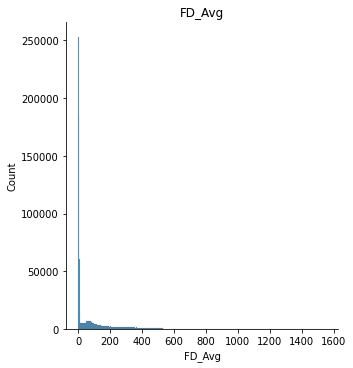

In [10]:
sns.displot(df_Moufia['FD_Avg'])
plt.title("FD_Avg")
sns.despine()

In [11]:
print("Skewness: %f" % df_Moufia['FD_Avg'].skew())
print("Kurtosis: %f" % df_Moufia['FD_Avg'].kurt())
#The distribution has positive long thin tail, the mass of the distribution is concentrated on the left of the figure. And the tail FD_Avg distribution far exceeds the tails of the normal distribution.

Skewness: 3.630061
Kurtosis: 17.868220


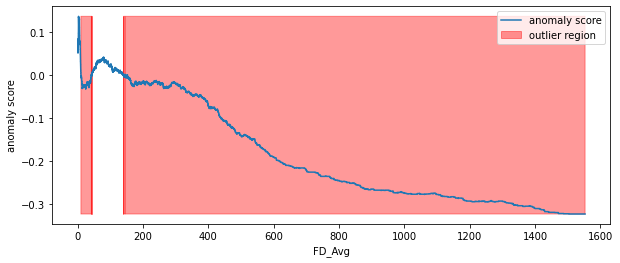

In [14]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df_Moufia['FD_Avg'].values.reshape(-1, 1))
xx = np.linspace(df_Moufia['FD_Avg'].min(), df_Moufia['FD_Avg'].max(), len(df_Moufia)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('FD_Avg')
plt.show();

In [18]:
df_Moufia.loc[(df_Moufia['FD_Avg'] >= 200)]

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
566,2014-01-01 09:26:00,208.9,211.7,973.5000,76.66666,23.53333,140.98970,5.200000
567,2014-01-01 09:27:00,216.4,213.0,973.5000,76.90000,23.68333,145.80940,4.166667
568,2014-01-01 09:28:00,215.5,215.7,973.4666,75.30000,23.83333,149.11640,5.700000
569,2014-01-01 09:29:00,216.8,214.8,973.4500,75.23333,23.96667,141.34310,4.066667
570,2014-01-01 09:30:00,210.7,213.4,973.4000,74.53333,24.05000,135.95830,4.850000
...,...,...,...,...,...,...,...,...
1022841,2015-12-30 11:41:00,219.0,219.1,974.8499,71.65000,25.30000,91.00024,6.900000
1022842,2015-12-30 11:42:00,214.5,211.9,974.8833,72.05000,25.30000,104.66100,4.216667
1022843,2015-12-30 11:43:00,206.2,206.9,974.9000,71.93333,25.30000,103.81610,4.233334
1022856,2015-12-30 11:56:00,206.5,203.4,974.9000,73.40000,25.20000,101.86690,5.383333
